In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
# Load the sklearn MNIST Dataset
digits = load_digits()

In [3]:
X = digits.data
Y= digits.target

In [4]:
print(X.shape,Y.shape)

(1797, 64) (1797,)


In [10]:
plt.style.use('seaborn')

0


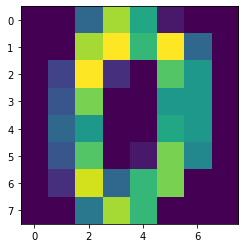

In [5]:
plt.imshow(X[0].reshape((8,8)))
print(Y[0])
plt.show()

- These features are gonna be descrete image. 
- Values are not continous they are descrete
- Each xi takes between 0-16 in case of grayscale image
                        0-255 in case of RGB Image
- 0 is for black and 15 for white
- multinomial will be beneficial as they are descrete

## Train Models

In [6]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [7]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [8]:
# Train
mnb.fit(X,Y)
gnb.fit(X,Y)

GaussianNB()

In [9]:
print(mnb.score(X,Y))
print(gnb.score(X,Y))

0.9053978853644964
0.8580968280467446


Gaussian is making a more stronger assumption so it is giving lesser score

In [10]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10).mean()

0.8113904407200497

In [11]:
cross_val_score(mnb,X,Y,scoring="accuracy",cv=10).mean()

0.8797858472998138

Multinomial naive is giving better results. 
This is bcz each feature is descrete value

In [12]:
def prior_prob(y_train,label):
    total_example = y_train.shape[0]
    class_example = np.sum(y_train==label)
    
    return (class_example)/(total_example)

def conditional_prob(x_train,y_train,feature_column,feature_val,label):
    x_filtered = x_train[y_train==label]
    numerator = np.sum(x_filtered[:,feature_column]==feature_val) 
    denominator = np.sum(y_train==label)
    
    return numerator/denominator

def predict(x_train,y_train,xtest):
    """ Xtest is a single testing point , n featres"""
    classes = np.unique(y_train)
    n_features = x_train.shape[1]
    post_probs = [] # List of prob for all classes and given a single testing point
    # Compute Posterior for each class
    for label in classes:
        # post = likelihood * prior
        likelihood = 1.0
        for f in range(n_features):
            cond = conditional_prob(x_train,y_train,f,xtest[f],label)
            likelihood *= cond
        
        prior = prior_prob(y_train,label)
        
        post = likelihood*prior
        post_probs.append(post)
    pred = np.argmax(post_probs)
    return pred

def score(x_train,y_train,x_test,y_test):
    pred =[]
    for i in range(x_test.shape[0]):
        pred_label = predict(x_train,y_train,x_test[i])
        pred.append(pred_label)
    pred = np.array(pred)
    accuracy = np.sum(pred==y_test)/y_test.shape[0]
    return accuracy
        

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1437, 64) (360, 64)
(1437,) (360,)


In [14]:
score(x_train,y_train,x_test,y_test)

0.65

In [18]:
output = predict(x_train,y_train,x_test[0])
output

1

In [17]:
print(y_test[0])

1
